In [157]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats

In [ ]:
def gamma(a):
    result = 0
    result = integrate.quad(lambda x: np.power(x, a-1)*np.exp(-x), 0, np.inf)
    return result[0]

In [34]:
# Problem 2 (c)
theta_ML_2 = 0.2
theta_ML_1 = 0.8
x = np.linspace(0, 1, 101)

y1_prior = []
y2_prior = []
y3_prior = []
y1_post = []
y2_post = []
y3_post = []

for i in x:
    y1_prior.append(gamma(11)/(gamma(10)*gamma(1))*np.power(1-i, 10-1)*np.power(i, 1-1))
    y1_post.append(gamma(16)/(gamma(14)*gamma(2))*np.power(1-i, 14-1)*np.power(i, 2-1))
    y2_prior.append(gamma(20)/(gamma(10)*gamma(10))*np.power(1-i, 10-1)*np.power(i, 10-1))
    y2_post.append(gamma(25)/(gamma(14)*gamma(11))*np.power(1-i, 14-1)*np.power(i, 11-1))
    y3_prior.append(gamma(0.3)/(gamma(0.1)*gamma(0.2))*np.power(1-i, 0.1-1)*np.power(i, 0.2-1))
    y3_post.append(gamma(5.3)/(gamma(4.1)*gamma(1.2))*np.power(1-i, 4.1-1)*np.power(i, 1.2-1))

<ipython-input-34-23c78ecb51ab>:17: RuntimeWarning: divide by zero encountered in power
  y3_prior.append(gamma(0.3)/(gamma(0.1)*gamma(0.2))*np.power(1-i, 0.1-1)*np.power(i, 0.2-1))


Text(0.5, 1.0, 'case 1')

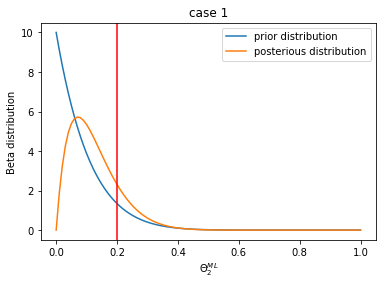

In [57]:
# Plot for case 1
plt.plot(x, y1_prior, label="prior distribution")
plt.plot(x, y1_post, label = "posterious distribution")
plt.axvline(x = 0.2, color="r")
plt.xlabel("$\Theta_2^{ML}$")
plt.ylabel("Beta distribution")
plt.legend()
plt.title("case 1")

Text(0.5, 1.0, 'case 2')

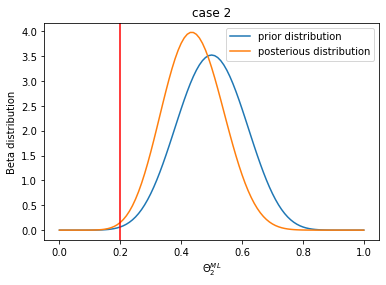

In [56]:
# Plot for case 2
plt.plot(x, y2_prior, label="prior distribution")
plt.plot(x, y2_post, label="posterious distribution")
plt.axvline(x = 0.2, color="r")
plt.xlabel("$\Theta_2^{ML}$")
plt.ylabel("Beta distribution")
plt.legend()
plt.title("case 2")

Text(0.5, 1.0, 'case 3')

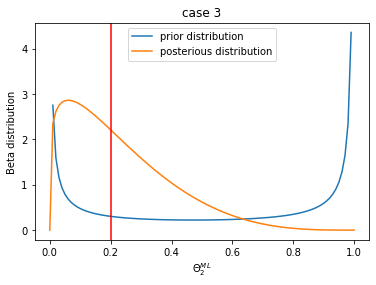

In [55]:
# Plot for case 3
plt.plot(x, y3_prior, label = "prior distribution")
plt.plot(x, y3_post, label="posterious distribution")
plt.axvline(x = 0.2, color="r")
plt.xlabel("$\Theta_2^{ML}$")
plt.ylabel("Beta distribution")
plt.legend()
plt.title("case 3")

In [58]:
ugrad = np.loadtxt('hw4-ugrad.dat', unpack = True)

In [147]:
# Problem 3
# (c)
Dc = ugrad[0:10]

sd_prior = 2
mean_prior = 0
sigma2 = 3

miu_ml_c = sum(Dc)/len(Dc)


m_new_c = (len(Dc) * sd_prior**2 * miu_ml_c)/(sigma2+len(Dc)*sd_prior**2)
shrinkage_c = 1 - m_new_c/miu_ml_c
s_2_c = (sd_prior**2*sigma2)/(sigma2+len(Dc)*sd_prior**2)

print("The mu_ml is: " + str(miu_ml_c))
print("The new mean is: " + str(m_new_c))
print("The new variance is: " + str(s_2_c))
print("The shrinkage is: " + str(shrinkage_c))

The mu_ml is: -2.8914014999999997
The new mean is: -2.6896758139534884
The new variance is: 0.27906976744186046
The shrinkage is: 0.06976744186046502


In [148]:
# (d)

miu_ml_d = sum(ugrad)/len(ugrad)


m_new_d = ((len(ugrad)/sigma2)*miu_ml_d)/((1/np.power(sd_prior, 2))+(len(ugrad)/sigma2))
shrinkage_d = 1 - m_new_d/miu_ml_d
s_2_d = (sd_prior**2*sigma2)/(sigma2+len(ugrad)*sd_prior**2)


print("The mu_+ml is: " + str(miu_ml_d))
print("The new mean is: " + str(m_new_d))
print("The new variance is: " + str(s_2_d))
print("The shrinkage is: " + str(shrinkage_d))

The mu_+ml is: -2.893530685999996
The new mean is: -2.889196890664
The new variance is: 0.005991013479780329
The shrinkage is: 0.0014977533699450651


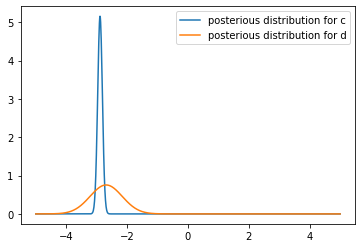

In [146]:
x = np.linspace(-5, 5, 1001)
y_c = []
y_d = []

for i in x:
    y_c.append((1/(np.sqrt(2*np.pi*s_2_c)))*np.exp(-(i-m_new_c)**2/(2*s_2_c)))
    y_d.append((1/(np.sqrt(2*np.pi*s_2_d)))*np.exp(-(i-m_new_d)**2/(2*s_2_d)))

plt.plot(x, y_d, label="posterious distribution for c")
plt.plot(x, y_c, label="posterious distribution for d")
plt.legend()

-2.8914014999999997
1.2394331994696002


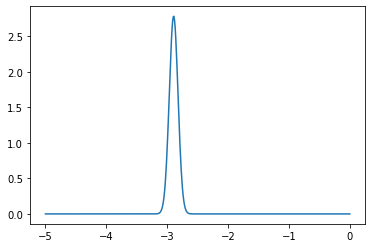

In [159]:
# Problem 4
# (b)
x = np.linspace(-5, 0, 501)
a = 1
miu_ml = sum(ugrad)/len(ugrad)
sigma = np.sqrt(2.56/len(ugrad))
y = []
y = 0.5*stats.norm.pdf(x, miu_ml, sigma)
plt.plot(x, y)